# Bivariate Gaussian Distributions

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/)*

*Written by: Patricia Mares Nasarre*

*Due: `Wednesday 1st October 2025`*

## Part 1: Introduction and set up

In this workshop, you will work with data on water quality of offshore waters, namely the concetration of nitrogen ($DIN$) and the concentration of phosphorus ($DIP$). As you probably know, these variables are nutrients which are key for the growth of species of algae and molluscs that feed on them. In order to guarantee the survival of these species, a minimum amount of nutrients in the water is needed so they do not starve.

Currently, there is a growing interest in installing farms of species such as mussels and seaweed offshore due to the limited space in coastal waters. When selecting the location of one of these farms, the availability of enough nutrients in the water is checked so the farmed species can survive and the farm is economically feasible. We can check that by computing the probability of meeting the minimum amount of nutrients in the water.

Here, you will first quantify the relationship between $DIN$ and $DIP$ (if they were independent, you could model them using independent univariate distributions!). As you can imagine, there is a relationship between the presence of both nutrients so, afterwards, you will model the bivariate distribution of $DIN$ and $DIP$ using a bivariate Gaussian distribution. Finally, you will use it to compute the probabilities of meeting some conditions.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
from scipy.stats import norm
import matplotlib.pyplot as plt
from statistics import mean, stdev
import os
from urllib.request import urlretrieve

In [2]:
def findfile(fname):
    if not os.path.isfile(fname):
        print(f"Downloading {fname}...")
        urlretrieve('http://files.mude.citg.tudelft.nl/'+fname, fname)

findfile('S_FINO3_DIN_DIP.csv')

In [3]:
data = np.loadtxt('S_FINO3_DIN_DIP.csv', delimiter = ',', skiprows=1)
data

array([[6.03592280e-02, 3.02578956e-06],
       [5.95290470e-02, 2.04355196e-05],
       [5.93071170e-02, 3.71527131e-05],
       ...,
       [3.25222830e-02, 2.01853000e-04],
       [3.35456130e-02, 2.09721000e-04],
       [3.53485200e-02, 2.18798000e-04]], shape=(5808, 2))

## Part 2: Covariance and correlation

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 2.1:**

Plot variable X against variable Y. How do you expect the correlation to be? Make sure to label your plot!
    
</p>
</div>

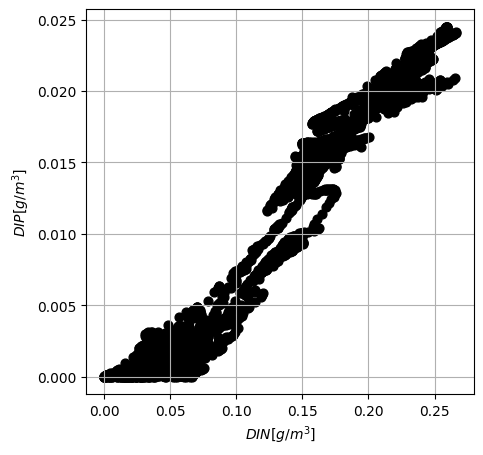

In [4]:
fig, axs = plt.subplots(1, 1)
axs.scatter(data[:,0], data[:,1], 40, 'k')
axs.set_ylabel('${DIP} [g/m^3]$')
axs.set_xlabel('${DIN} [g/m^3]$')
fig.set_size_inches(5, 5)
axs.grid();

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 2.2:**

It looks like a relationship exists between both variables. Let's quantify it!

Define a function which calculates the covariance between two variables. The function must take as input the two vectors of observations. The output of the function must be the value for the covariance. Apply the function to the dataset to calculate the covariance between $DIN$ and $DIP$. Interpret the obtained value of the covariance. You may want to write out the calculations steps on paper before starting to code.

*Important: you have to code the function yourself, do not use a prebuilt function from a package.*

*Hint: you can use the function zip to multiply two lists.*
</p>
</div>

In [5]:
def calculate_covariance(X1, X2):
    mean_x1 = mean(X1)
    mean_x2 = mean(X2)
    diff_x1 = [item-mean_x1 for item in X1]
    diff_x2 = [item-mean_x2 for item in X2]
    product = [a*b for a,b in zip(diff_x1,diff_x2)]
    covariance = mean(product)
    return covariance

print('The covariance between DIN and DIP is', 
      np.round(calculate_covariance(data[:,0], data[:,1]), 5))

The covariance between DIN and DIP is 0.00064


<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

**Solution 2.2:**

Please, note that this solution of the calculation of the covariance is not the only one! This solution uses the following equation:

$
\mathrm{Cov}(X_1,X_2)=\mathbb{E}[(X_{1,i} - \mathbb{E}(X_1))(X_{2,i} - \mathbb{E}(X_2))]
$

You might have implemented the same equation using a loop or you might have used the alternative equation:

$
\mathrm{Cov}(X_1,X_2)=\mathbb{E}(X_1 X_2)-\mathbb{E}(X_1)\mathbb{E}(X_2)
$

Both equations should yield the same results. If you have doubts about your specific implementation, please, reach us out.

As expected from the visualization plot, the covariance is positive meaning that higher values of $DIN$ are related to higher values of $DIP$. The value of the covariance is very small as its units are the product of the units of random variables, which have very low values. That might trick us and make us think that the strength of the relationship between the variables is small, while the visualization indicates that the strength of the relationship is strong.

</p></div>

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 2.3:**

Define a function which calculates Pearson's correlation coefficient between two variables. The function must take as input the two vectors of observations. The output of the function must be the value for the correlation coefficient. Apply the function to the dataset to calculate the correlation coefficient between $DIN$ and $DIP$. Interpret the obtained value of the Pearson's correlation coefficient and compare it with the obtained covariance.

*Hint: You may want to use the function for finding the covariance that you defined above*

</p>
</div>

In [6]:
def pearson_correlation(X1, X2):
    covariance = calculate_covariance(X1, X2)
    correl_coeff = covariance/(stdev(X1)*stdev(X2))
    return correl_coeff

print("Pearson's correlation coefficient between DIN and DIP is", 
      np.round(pearson_correlation(data[:,0], data[:,1]), 2))

Pearson's correlation coefficient between DIN and DIP is 0.98


<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

**Solution 2.3:**

As expected, the correlation coefficient shows a string positive relationship between $DIN$ and $DIP$. Since Pearson's correlation coefficient is dimensionless and standardized, it is easier to interpret.

</p></div>

## Part 3: Bivariate Gaussian distribution

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 3.1:**

Model the joint distribution of $DIN$ and $DIP$ using a bivariate Gaussian distribution.
Follow the following steps:
- Define the vector of means
- Define the covariance matrix
- Define the bivariate Gaussian distribution and draw 100 samples to compare with the observations.

Do you see differences between the observations and the samples from the bivariate Gaussian distribution?
</p>
</div>

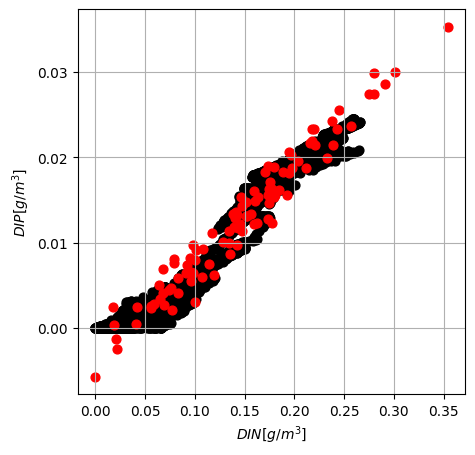

In [7]:
# Define the vector of means
mu1 = mean(data[:,0]) #mu_1
mu2 = mean(data[:,1]) #mu_2
mu = [mu1, mu2] #vector of means

# Define the covariance matrix
s1 = stdev(data[:,0])  #sigma_x1
s2 = stdev(data[:,1])  #sigma_x2
covariance = calculate_covariance(data[:,0], data[:,1]) # covariance
sigma = np.array([[s1**2 , covariance], [covariance, s2**2]]) #Covariance matrix

# Draw 100 samples from a bivariate Gaussian distribution
samples = multivariate_normal(mean=mu, cov=sigma).rvs(size=100)

# Scatter plot against observations
fig, axs = plt.subplots(1, 1)
axs.scatter(data[:,0], data[:,1], 40, 'k')
axs.scatter(samples[:,0], samples[:,1], 40, 'r')
axs.set_ylabel('${DIP} [g/m^3]$')
axs.set_xlabel('${DIN} [g/m^3]$')
fig.set_size_inches(5, 5)
axs.grid();


<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

**Solution 3.1**

The Gaussian distribution does not present bounds, differently to other distributions such as the Lognormal distribution that it is not defined for negative values. Therefore, we obtain samples for $DIN$ and $DIP$ that are negative. Negative concentrations do not have any physical sense, being that a flaw of the bivariate Gaussian distribution as a model in this context.

</p></div>

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 3.2:**

Using the defined bivariate Gaussian distribution, compute and plot the bivariate CDF as contours where joint probabilities are projected. This is, the x- and y-axis are the values of $DIN$ and $DIP$ and the contours in the plot represent values of joint probabilities.
</p>
</div>

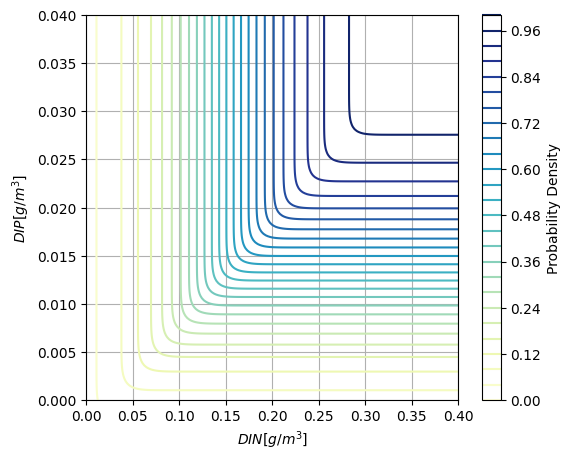

In [8]:
# Define the mesh of values where we want to evaluate the random variables
n = 200 #size of the mesh
values_DIN = np.linspace(0,mu[0]+3.8*s1,n)
values_DIP = np.linspace(0,mu[1]+3.8*s2,n)

# Define the grid
X1,X2 = np.meshgrid(values_DIN,values_DIP)
X = np.array([np.concatenate(X1.T), np.concatenate(X2.T)]).T

# Evaluate the CDF
Z = multivariate_normal(mean=mu, cov=sigma).cdf(X)

# Create contours plot
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
contours = ax.contour(X1, X2, Z.reshape(X1.shape).T, 25, cmap='YlGnBu', vmin=0)
ax.grid()
ax.set_xlim([0, 0.4])
ax.set_ylim([0, 0.04])
ax.set_xlabel('${DIN} [g/m^3]$')
ax.set_ylabel('${DIP} [g/m^3]$')
fig.colorbar(contours, ax=ax, label='Probability Density');


<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

**Solution 3.1:**

You might have used different limits for the `np.linspace`, that is fine! Here we make use of the properties of the Gaussian distribution, where a value of $\mu+3.8\sigma$ corresponds to the 0.9999 percentile of the distribution.

</p></div>

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 3.3:**

Using the defined bivariate Gaussian distribution, compute the following probabilities:
- $P[DIN>0.3]$
- $P[DIN \leq 0.3 \ AND \ DIP \leq 0.005]$
- $P[DIN \leq 0.3 \ OR \ DIP \leq 0.005]$
- $P[DIN > 0.3 \ AND \ DIP > 0.005]$

The last probability would represent the probability of meeting the minimum requirement of nutrients to ensure the survival of the species (note that the values of the requirements are not realistic). Based on the result, would your species starve? Would you build the farm?
</p>
</div>

In [9]:
# probability DIN>0.3
prob_din_higher_03 = 1-norm.cdf(0.3, loc = mu1, scale = s1)
print('P[DIN>0.3]=', np.round(prob_din_higher_03, 3))

# probability DIN<0.3 and DIP<0.005
prob_joint_lower = multivariate_normal(mean=mu, cov=sigma).cdf([0.3, 0.005])
print(f'P[DIN<0.3 AND DIP<0.005]=', np.round(prob_joint_lower, 3))

#probability DIN<0.3 or DIP<0.005
prob_din_lower_03 = norm.cdf(0.3, loc = mu1, scale = s1)
prob_dip_lower_0005 = norm.cdf(0.005, loc = mu2, scale = s2)
prob_or_lower = prob_din_lower_03 + prob_dip_lower_0005 - prob_joint_lower
print(f'P[DIN<0.3 OR DIP<0.005]=', np.round(prob_or_lower, 3))

#probability DIN>0.3 and DIP>0.005
prob_joint_upper = 1- prob_din_lower_03 - prob_dip_lower_0005 + prob_joint_lower
print(f'P[DIN>0.3 AND DIP>0.005]=', np.round(prob_joint_upper, 3))


P[DIN>0.3]= 0.024
P[DIN<0.3 AND DIP<0.005]= 0.175
P[DIN<0.3 OR DIP<0.005]= 0.976
P[DIN>0.3 AND DIP>0.005]= 0.024


## Part 4: Conditionalizing the Bivariate Gaussian distribution

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

**Task 4.1:**

Compute the distribution of $DIP$, given that the value of $DIN = 0.05$. Plot the PDFs for both the unconditional distribution of $DIP$ and the conditionalized distribution of $DIP$. Comment on the differences of the two distributions and explain why those changes appear.

Compute the parameters of the conditional distribution of $DIP$ using pen and paper and make use of the properties of the Gaussian distribution.
</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

**Solution 4.1:**

One of the properties of the multivariate Gaussian distribution is that, when we conditionalize, we always obtain another Gaussian distribution. Here, we are working with a bivariate distribution and we are conditionalizing on one variable ($DIN$). Therefore, we will obtain a univariate Gaussian distribution for $DIP$. But which one?

We can compute the (new) parameters of the conditional distribution of $DIP$ using the following expressions (note that they assume that the conditioning variable is $X_2$):

$$
\hat{\mu}=\mu_1+\Sigma_{12}\Sigma_{22}^{-1}(a-\mu_2)
$$

$$
\hat{\Sigma}=\Sigma_{11}-\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}
$$

Note that the covariance matrix for the conditioned distribution reduces to the conditional variance of $DIP$. This is because we have a bivariate distribution, so given the value of one variable, the resulting conditional distribution is univariate. However, if we had been working with a distribution of 3 variables, when conditionalizing in one, we would have obtained a conditional bivariate distribution.
</p></div>

In [10]:
# Computing the parameters of the conditional Gaussian distribution using the expressions above
cond_mu_DIP = mu[1]+sigma[1][0]*sigma[0][0]**(-1)*(0.05-mu[0])
print('The unconditional mean of $DIP$ is', mu[1], 'while the conditioned mean is', cond_mu_DIP)
cond_sigma_DIP=sigma[1][1]-sigma[1][0]*sigma[0][0]**(-1)*sigma[0][1]
print('The unconditional standard deviation of $DIP$ is', (sigma[1][1])**(0.5), 'while the conditioned standard deviation is', (cond_sigma_DIP)**(0.5))

The unconditional mean of $DIP$ is 0.012846317774636993 while the conditioned mean is 0.0025683184847934398
The unconditional standard deviation of $DIP$ is 0.00841043546821725 while the conditioned standard deviation is 0.0016414416347771679


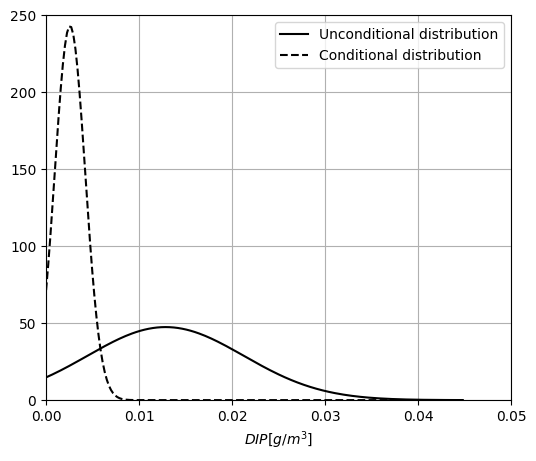

In [11]:
# Evaluate both the conditional and unconditional PDFs of DIP
uncond_DIP_pdf = norm.pdf(values_DIP, loc = mu[1], scale = (sigma[1][1])**(0.5))
cond_DIP_pdf = norm.pdf(values_DIP, loc = cond_mu_DIP, scale = (cond_sigma_DIP)**(0.5))

# Plot both PDFs
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.plot(values_DIP, uncond_DIP_pdf, 'k', label = 'Unconditional distribution')
ax.plot(values_DIP, cond_DIP_pdf, '--k', label = 'Conditional distribution')
ax.grid()
ax.set_xlim([0, 0.05])
ax.set_ylim([0, 250])
ax.set_xlabel('pdf')
ax.set_xlabel('${DIP} [g/m^3]$')
ax.legend();

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">

**Solution 4.1:**

In the plot above, we can observe two main differences between the distributions: (1) location, and (2) width of the distribution. 

Since we have conditionalized on a low value of $DIN$ (below its mean) and the variables are positively correlated, the distribution of $DIP$ also moves to lower values. If the variables were negatively correlated, the opposite behavior would be observed. 

When conditionalizing, we are providing with more information to the model and, in general, conditional distributions are expected to be narrower than unconditional ones. In the case of the multivariate Gaussian distribution that is always the case. Note that for other joint distribution that might not be the case.

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%">
<p>
End of solution.
</p>
</div>

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    &copy; Copyright 2025 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. 
    This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.
  </div>
</div>